### 목표
- 텍스트마이닝의 개념을 이해하고, 텍스트데이터 처리 프로세스를 알아보자
- 자연어 처리를 위한 기본 기념 이해하자

#### NLP vs Text Mining
- Text Mining : 비정형 텍스트 데이터에서 의미있는 정보를 추출하는 학문
- NLP : 인간의 언어를 이해하는데 집중된 학문 (음성인식, 챗봇)

#### Text Mining 종류
- 텍스트 분류 : 텍스트가 속하는 카테고리를 분류하는 분석
- 감성분석 : 텍스트에서 나타나는 감정/기분/의견 등을 분석
- 텍스트 요약 : 텍스트에서 중요한 주제를 나타내는 키워드, 문장 등을 추출/생성
- 텍스트 군집화와 유사도 측정 : 텍스트의 비슷한 정도를 측정하고 그룹핑하는 분석

#### 텍스트 분석 프로세스
1. 문제정의
2. 데이터 수집
3. 데이터 탐색 및 전처리
    1. 텍스트 전처리
        - 클렌징 (대/소문자 변경, 특수문자/이모티콘 삭제, 띄어쓰기 교정, 오탈자 수정) : re(정규표현식), hanspell(한국어 띄어쓰기 교정)
        - 불용어처리 (stop word) 제거
        - 토큰화 (텍스트를 잘게 쪼개는 작업)
        - 어근추출(Stemming/Lemmatization)
        
            - 영어 : nltk
            - 한국어 : konlpy(형태소 분석기)
    2. 피쳐 벡터화/추출: 정형화 작업, 글자에서 정해진 알고리즘에 따라 숫자로 변경
        - 단순 언어의 빈도
        - BOW(Bakc Of Word)
        - tf-idf
        - word embedding(워드 임베딩)
4. 모델 학습
5. 모델 평가
6. 서비스화

#### 데이터 로딩
- 네이버 영화 리뷰 데이터

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 100) # 데이터프레임의 기본 컬럼 너비 조정

In [2]:
train = pd.read_csv("./data/ratings_train.txt", delimiter='\t')
test = pd.read_csv("./data/ratings_test.txt", delimiter='\t')

In [3]:
display("Train data")
display(train.head())
display("Test data")
display(test.head())


'Train data'

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다,1


'Test data'

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


##### 결측치 확인, 데이터 갯수 확인

In [4]:
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


None

##### 결측치 데이터 삭제

In [5]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [6]:
train.shape, test.shape

((149995, 3), (49997, 3))

##### 단어빈도 분석
- 워드 카운트 : 단어의 등장 빈도를 측정하는 알고리즘
- 토큰화 -> 빈도수 측정 -> 정렬

In [7]:
# 부정리뷰먼 불리언색인 해보자
negative_reviews = train[train['label']==0].copy()['document']
negative_reviews

0                                                              아 더빙.. 진짜 짜증나네요 목소리
2                                                                너무재밓었다그래서보는것을추천한다
3                                                    교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
5                                    막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
6                                                            원작의 긴장감을 제대로 살려내지못했다.
                                            ...                                   
149990                                                                이걸 영화라고 찎었냐?
149992    공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 5점정도가 적당한 거 같은데 평점이 좀 높아서ㅋㅋ
149995                                                         인간이 문제지.. 소는 뭔죄인가..
149997                                             이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149999                                                    한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 75170, dtype: object

In [8]:
# 토큰화
token_list = [t for doc in negative_reviews for t in doc.split(" ")]
token_list

['아',
 '더빙..',
 '진짜',
 '짜증나네요',
 '목소리',
 '너무재밓었다그래서보는것을추천한다',
 '교도소',
 '이야기구먼',
 '..솔직히',
 '재미는',
 '없다..평점',
 '조정',
 '막',
 '걸음마',
 '뗀',
 '3세부터',
 '초등학교',
 '1학년생인',
 '8살용영화.ㅋㅋㅋ...별반개도',
 '아까움.',
 '원작의',
 '긴장감을',
 '제대로',
 '살려내지못했다.',
 '별',
 '반개도',
 '아깝다',
 '욕나온다',
 '이응경',
 '길용우',
 '연기생활이몇년인지..정말',
 '발로해도',
 '그것보단',
 '낫겟다',
 '납치.감금만반복반복..이드라마는',
 '가족도없다',
 '연기못하는사람만모엿네',
 '울면서',
 '손들고',
 '횡단보도',
 '건널때',
 '뛰쳐나올뻔',
 '이범수',
 '연기',
 '드럽게못해',
 '취향은',
 '존중한다지만',
 '진짜',
 '내생에',
 '극장에서',
 '본',
 '영화중',
 '가장',
 '노잼',
 '노감동임',
 '스토리도',
 '어거지고',
 '감동도',
 '어거지',
 '굿바이',
 '레닌',
 '표절인것은',
 '이해하는데',
 '왜',
 '뒤로',
 '갈수록',
 '재미없어지냐',
 '재미없다',
 '지루하고.',
 '같은',
 '음식',
 '영화인데도',
 '바베트의',
 '만찬하고',
 '넘',
 '차이남....바베트의',
 '만찬은',
 '이야기도',
 '있고',
 '음식',
 '보는재미도',
 '있는데',
 ';',
 '이건',
 '볼게없다',
 '음식도',
 '별로',
 '안나오고,',
 '핀란드',
 '풍경이라도',
 '구경할랫는데',
 '그것도',
 '별로',
 '안나옴',
 'ㅡㅡ',
 '주제는',
 '좋은데',
 '중반부터',
 '지루하다',
 '다',
 '짤랐을꺼야.',
 '그래서',
 '납득할',
 '수',
 '없었던거야..',
 '그럴꺼야..',
 '꼭',
 '그랬던걸꺼야..',
 '카밀라벨',
 '발연기',
 '졸쓰레기',
 

In [9]:
# Counter 활용 단어빈도 측정
from collections import Counter

In [10]:
counter = Counter(token_list)

In [11]:
# 빈도가 높은 것 확인
counter.most_common(40)

[('영화', 5245),
 ('너무', 3887),
 ('진짜', 3044),
 ('정말', 2500),
 ('그냥', 2384),
 ('이', 2257),
 ('왜', 2184),
 ('이런', 1867),
 ('영화.', 1662),
 ('다', 1553),
 ('좀', 1532),
 ('이건', 1463),
 ('더', 1444),
 ('영화는', 1413),
 ('영화를', 1329),
 ('영화가', 1261),
 ('쓰레기', 1234),
 ('이게', 1232),
 ('없는', 1225),
 ('내가', 1081),
 ('평점', 1078),
 ('이렇게', 1034),
 ('그', 1026),
 ('보고', 968),
 ('이거', 960),
 ('수', 894),
 ('없고', 887),
 ('본', 854),
 ('무슨', 842),
 ('완전', 830),
 ('보는', 811),
 ('ㅋㅋ', 809),
 ('최악의', 806),
 ('봤는데', 723),
 ('잘', 709),
 ('아', 704),
 ('뭐', 700),
 ('많이', 692),
 ('평점이', 682),
 ('내', 678)]

##### 워드 클라우드 시각화

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud

In [18]:
wc = WordCloud(background_color="white", # 배경을 하얀색으로 설정
               font_path="C:\Windows\Fonts\malgunsl.ttf", # 한글 폰트 설정
               random_state=504)

In [19]:
freq = counter.most_common(40)
cloud_rs = wc.generate_from_frequencies(dict(freq))

In [20]:
import matplotlib.pyplot as plt

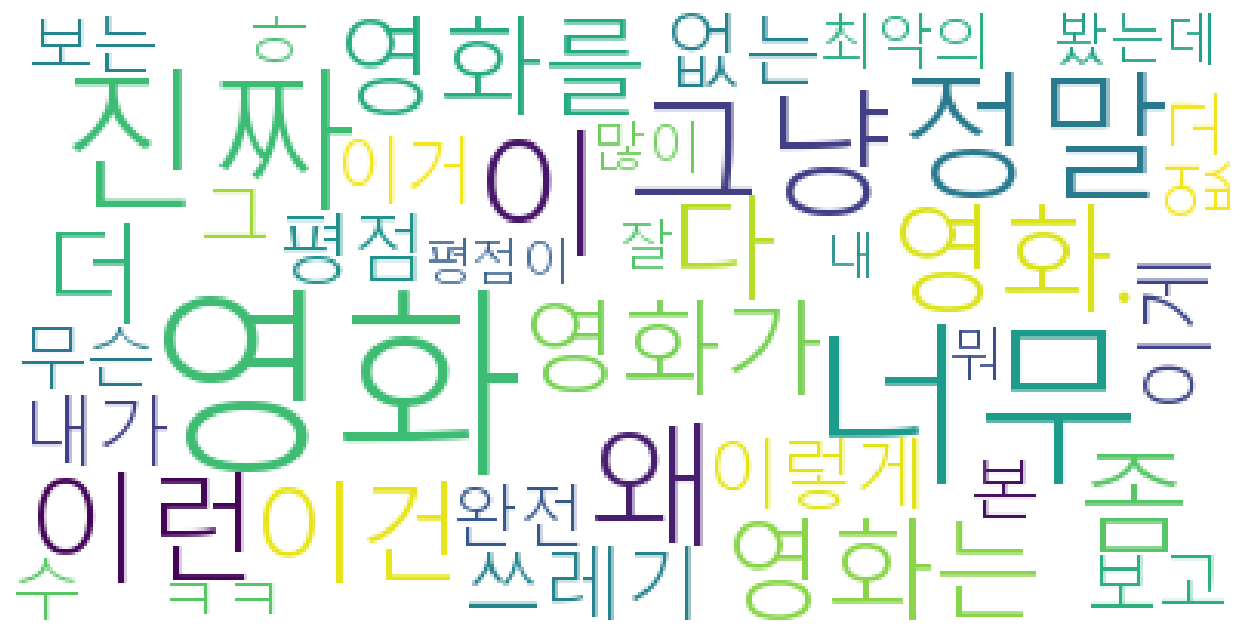

In [21]:
plt.figure(figsize=(20,8))
plt.imshow(cloud_rs)
plt.axis("off") # x축, y축 끄기
plt.show()

#### 감성분석
- 감성사전을 이용한 분석
- 머신러닝 기반의 감성분석
    1. 토큰화
    2. 피쳐 백터화 ( BOW / tf-idf )
    3. 학습 및 평가

##### BOW
- 진행순서
    1. 단어를 토큰화 한다.
    2. 고유한 토큰을 정리한다.
    3. 각 document별로 토큰의 등장 횟수를 센다.
- 문맥의 순서를 고려하지 않는 방법
- 문맥의 순서자 고려되지 않아 자연어처리에서는 부적합
- 하지만 일반 텍스트 마이닝에서는 활용가치가 충분하다.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
sample_txt = ["나는 오늘 사과를 먹었다", "나는 어제 바나나를 먹었다", "너는 오늘 사과를 먹었다"]

In [31]:
cv_test = CountVectorizer()

In [32]:
# 띄어쓰기 중심으로 토큰화
# 고유한 토큰만 남겨서 단어사전을 구축
cv_test.fit(sample_txt)

CountVectorizer()

In [33]:
cv_test.vocabulary_
# 단어사전 구축

{'나는': 0, '오늘': 6, '사과를': 4, '먹었다': 2, '어제': 5, '바나나를': 3, '너는': 1}

In [34]:
# 구축된 단어사전을 기반으로 숫자로 변경
sample_txt_transformed =cv_test.transform(sample_txt)

In [37]:
# 단어사전이 길어지면 0이 너무 많아 불필요한 공간(메모리)을 차지하게 된다.
# 희소행렬 표기법을 이용해서 데이터를 압축한다.
sample_txt_transformed

<3x7 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [38]:
# 원래 데이터 형태로 보여준다
sample_txt_transformed.toarray()

array([[1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 1]], dtype=int64)

In [39]:
# 학습데이터 구성
naver_movie_cv = CountVectorizer()
naver_movie_cv.fit(train['document'])  # 토큰화 및 단어사전 구축

CountVectorizer()

In [40]:
len(naver_movie_cv.vocabulary_)

293366

In [41]:
X_train = naver_movie_cv.transform(train['document']) # 빈도를 측정해서 수치화
X_test = naver_movie_cv.transform(test['document']) # 빈도를 측정해서 수치화

In [42]:
X_train.shape,X_test.shape

((149995, 293366), (49997, 293366))

In [43]:
# 긍정 부정 라벨 추출
y_train = train['label']
y_test = test['label']

In [49]:
# 모델링 - LogisticRegrassion 모델 활용, 교차검증을 이용해서 score 확인
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score

model = LR()


In [50]:
res = cross_val_score(model,X_train,y_train,cv=5)
res.mean()

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8117203906796894

In [52]:
# 학습
model.fit(X_train, y_train)

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
# 한글은 학습, 예측 불가능이므로 BOW 처리
my_re = ["영화 존잼이욤", "흠.. 그냥 그랬음", "아이유 조녜다!!!"]
my_re_trans = naver_movie_cv.transform(my_re)

model.predict(my_re_trans)

array([0, 0, 1], dtype=int64)

In [54]:
# 확률값 , 예측 전에 확률 계산부터 한다!!
# 긍정일 확률, 부정일 확률
model.predict_proba(my_re_trans)

array([[0.50329052, 0.49670948],
       [0.84332527, 0.15667473],
       [0.45568891, 0.54431109]])

In [48]:
model.score(X_test,y_test)

0.814428865731944

##### tf-idf (Term Frequency - Inverse Document Frequency)
- tf : 개별문서에서 특정 단어의 빈도 수 
    - 개별문서에서 특정단어의 빈도수가 높으면 해당문서를 대표하는 특징이 된다
- df : 특정 단어를 가지고 있는 문서의 수
    - 전체 말뭉치에서 너무 과도하게 많은 문서에 등장하는 단어는 특징으로 의미가 없다

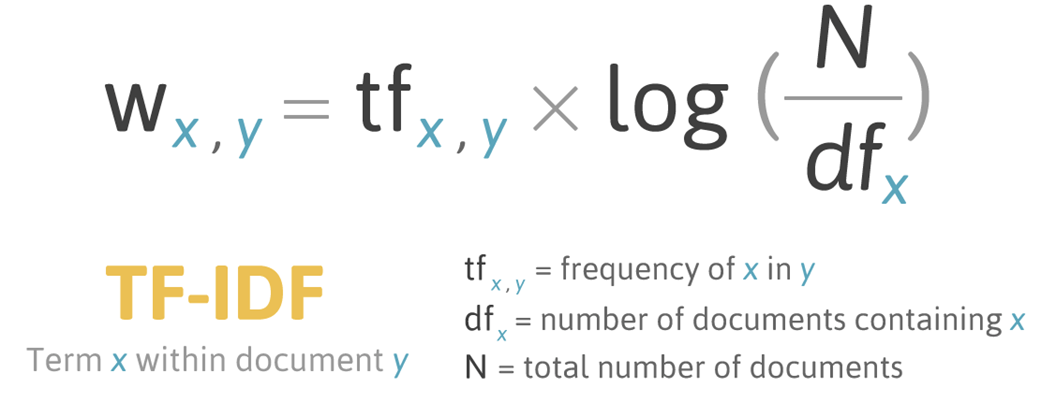

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
naver_movie_tfidf = TfidfVectorizer()

In [61]:
tfidf_test = TfidfVectorizer()
tfidf_test.fit(sample_txt)
tfidf_test.transform(sample_txt).toarray()

array([[0.52682017, 0.        , 0.40912286, 0.        , 0.52682017,
        0.        , 0.52682017],
       [0.44451431, 0.        , 0.34520502, 0.5844829 , 0.        ,
        0.5844829 , 0.        ],
       [0.        , 0.63174505, 0.37311881, 0.        , 0.4804584 ,
        0.        , 0.4804584 ]])

In [57]:
naver_movie_tfidf.fit(train['document']) #  토큰화와 단어사전 구축

TfidfVectorizer()

In [58]:
X_train2 = naver_movie_tfidf.transform(train['document']) # tfidf 방법으로 수치화

In [59]:
X_train2

<149995x293366 sparse matrix of type '<class 'numpy.float64'>'
	with 1074805 stored elements in Compressed Sparse Row format>

In [60]:
print(X_train2[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [62]:
# tfidf를 이용한 교차검증
model2 = LR()
cross_val_score(model2,X_train2, y_train,cv=5).mean()

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8094936497883263

##### 하이퍼파라미터 튜닝
- 파이프라인을 이용해 텍스트 전처리와 모델링 2단계로 이루어진 작업을 하나로 묶어보자
- TfidfVectorizer 하이퍼파라미터
    - max_df : 특정 단어가 전체 말뭉치에서 등장할 수 있는 최대 횟수를 지정
    - min_df : 특정 단어가 전체 말뭉치에서 등장할 수 있는 최소 횟수를 지정
    - ngram_range : 토큰을 묶어서 feature로 활용하는 정도를 지정
- LogisticRegression 하이퍼파라미터
    - C : 구제 파라미터 -> 값이 커지면 규제가 약하고, 값이 작아지면 규제가 커진다.

In [63]:
# 파이프라인 : 머신러닝 작업을 하나의 프로세스로 묶어주는 것
# ex) 일반 테이블 데이터 : 결측치 처리 -> 스케일러 -> 인코더 -> 모델
# ex) 비정형 텍스트 데이터 : 토큰화/수치화 -> 모델
from sklearn.pipeline import Pipeline

In [64]:
# 파이프라인 생성
pipeline = Pipeline([
    ('movie_tfidf', TfidfVectorizer()),
    ('movie_logi', LR())
])

In [65]:
# 모튼 하이퍼파라미터 조합을 돌려볼 수 있게 해주는 클래스
from sklearn.model_selection import GridSearchCV

In [66]:
graid_param = {
    'movie_tfidf__max_df' : [7000, 8500, 10000],
    'movie_tfidf__min_df' : [1, 5, 8, 10],
    'movie_tfidf__ngram_range' : [(1,2), (2,2), (1,3)],
    'movie_logi__C' : [0.001, 0.01, 0.1, 10, 100, 1000]
}

In [67]:
grid = GridSearchCV(pipeline, graid_param, cv=3, n_jobs=-1)
grid.fit(train['document'], y_train)

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('movie_tfidf', TfidfVectorizer()),
                                       ('movie_logi', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'movie_logi__C': [0.001, 0.01, 0.1, 10, 100, 1000],
                         'movie_tfidf__max_df': [7000, 8500, 10000],
                         'movie_tfidf__min_df': [1, 5, 8, 10],
                         'movie_tfidf__ngram_range': [(1, 2), (2, 2), (1, 3)]})

In [74]:
# grid 안에 제일 좋았던 정보 저장
# 결과 확인
print("최고점수 : ", grid.best_score_)
print("최고조합 : ", grid.best_params_)
# 최고 조합으로 학습된 모델
best_pipeline = grid.best_estimator_
# 단어사전의 수
print("단어사전의 수 : ", len(best_pipeline[0].vocabulary_))

최고점수 :  0.8138204539095115
최고조합 :  {'movie_logi__C': 1000, 'movie_tfidf__max_df': 7000, 'movie_tfidf__min_df': 1, 'movie_tfidf__ngram_range': (1, 2)}
단어사전의 수 :  1088746


In [94]:
best_pipeline.predict(["영화 재밋...나?", "그냥 저냥. 집에 가고 싶다", "ㅎ", "아이유 좋아요, 영화는 별로"])

array([1, 0, 1, 0], dtype=int64)

In [95]:
best_pipeline.predict_proba(["영화 재밋...나?", "그냥 저냥. 집에 가고 싶다", "ㅎ", "아이유 좋아요, 영화는 별로"])

array([[2.81217912e-04, 9.99718782e-01],
       [9.96115947e-01, 3.88405319e-03],
       [4.87693451e-01, 5.12306549e-01],
       [9.80591227e-01, 1.94087734e-02]])

##### 결과 시각화 하기

In [90]:
naver_vocab = best_pipeline[0].vocabulary_
naver_coef = best_pipeline[1].coef_[0]

In [91]:
# vocab 정렬하기
import pandas as pd
df = pd.DataFrame([naver_vocab.keys(), naver_vocab.values()],
                 index=["단어","인덱스"]).T.sort_values(by="인덱스").set_index("인덱스")
# vocab과 가중치 결합
df['가중치'] = naver_coef
df

c:\Users\SMHRD\anaconda3\lib\site-packages\pandas\core\indexes\base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,단어,가중치
인덱스,,
0,00,4.564019
1,00 00,1.830958
2,00 으로,-3.724382
3,000,0.413052
4,000 000,0.915931
...,...,...
1088741,綠林의,-1.495469
1088742,綠林의 무리들이,-1.495469
1088743,不好,-2.675599


In [92]:
# 가중치를 중심으로 정렬 -> 상위 30, 하위 30개 단어 추출
df.sort_values(by="가중치", inplace=True, ascending=False)
top30 = df.head(30)
bottom30 = df.tail(30)

<AxesSubplot:xlabel='단어'>

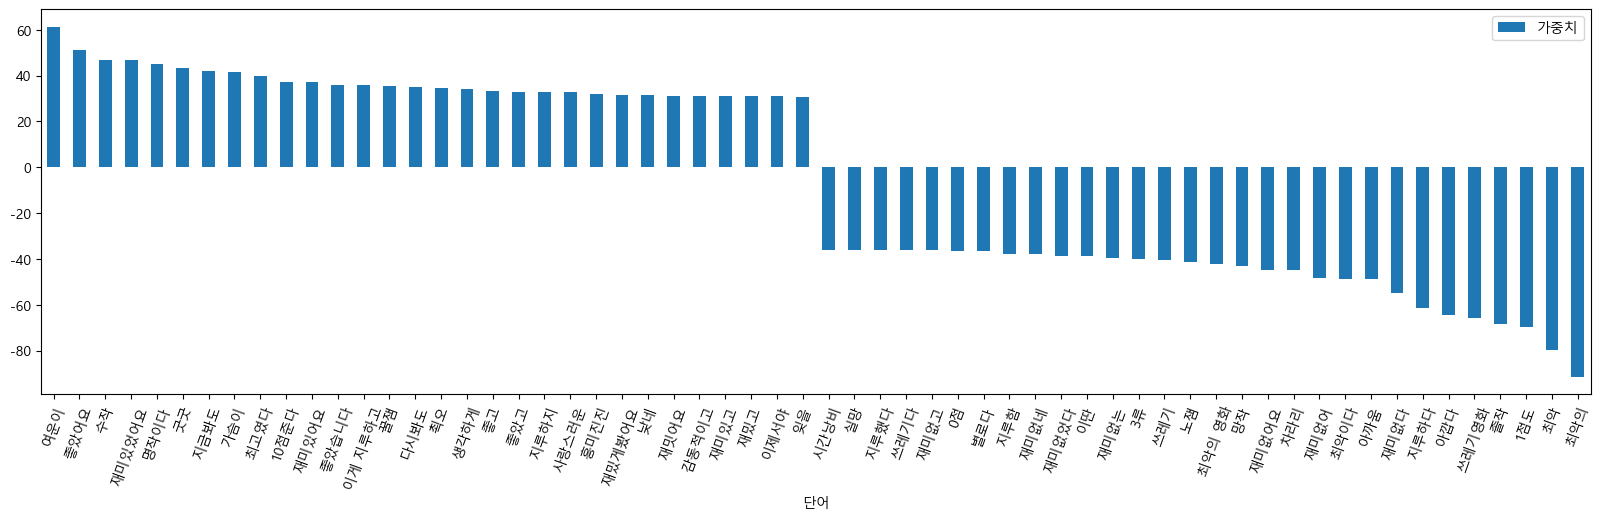

In [93]:
# 한글로 출력하기 위해서 폰트 지정하기!
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

# 마이너스 나오게하기
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 시각화
main_words = pd.concat([top30,bottom30])
main_words.set_index("단어").plot(kind='bar',
                                 figsize=(20,5),
                                 rot=70)